# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 10th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in your github repo under the folder **Assignment-4**.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1G5M6IcgGvx-hrQ2_iq7xp3Vso9tD_dv0?usp=drive_link
<h3><span style="color:red"> Deadline: 31st Jan, 2026 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [ ]:
from dataclasses import dataclass,field

@dataclass
class Book:
    title: str
    author: str
    ISBN: str
    _is_checked_out: bool = field(default=False, repr=False, init=False)

    def is_available(self) -> bool:
        return not self._is_checked_out
    
    
    def check_out(self)->None:
        self._is_checked_out = True
        
    
    def check_in(self)->None:
        self._is_checked_out = False
    
    def __repr__(self):
        return f"Title: {self.title}, Author: {self.author}, ISBN: {self.ISBN}"

    
@dataclass
class Patron:
    name:str
    patron_id: int
    borrowed_books : list[Book] = field(default_factory=list, init=False)

    def borrow_book(self, book: Book):
        if book in self.borrowed_books:
            raise ValueError(f"{book.title} is already borrowed")
        self.borrowed_books.append(book)

    def __str__(self):
        return f"Name: {self.name}, ID: {self.patron_id}, Borrowed Books: {'\n'.join([book.title for book in self.borrowed_books])}"
    
    def __repr__(self):
        return f"Name: {self.name}, ID: {self.patron_id}, Borrowed Books: {self.borrowed_books}"



@dataclass
class Library:
    books: dict[str,Book] =field(default_factory=dict)
    patrons: dict[int, Patron] = field(default_factory=dict)

    def add_book(self, book:Book):
        if book.ISBN in self.books:
            raise ValueError(f"{book} is already exist")
        self.books[book.ISBN] = book


    def add_patron(self, patron:Patron):
        if patron.patron_id in self.patrons:
            raise ValueError(f"{patron.patron_id} already exists")
        self.patrons[patron.patron_id] = patron


    def lend_book(self, book_isbn:str, patron_id:int):
        if book_isbn not in self.books:
            raise ValueError(f"'{book_isbn}' is not available in the library")

        if patron_id not in self.patrons:
            raise ValueError(f"Patron with ID {patron_id} is not registered")
        
        book = self.books.get(book_isbn)
        patron = self.patrons.get(patron_id)
        book_title = book.title
    
        if book.is_available():
                print(f"The book {book_title} is available to checkout")
                patron.borrow_book(book)
                book.check_out()
                print(f"{book_title} is assigned to {patron.name}")
        else:
            print(f"{book_title} is not available to check out")


    def return_book(self, book_isbn:str, patron_id:int):
        if book_isbn not in self.books:
            raise ValueError(f"'{book_isbn}' is not from this library")
        
        if patron_id not in self.patrons:
            raise ValueError(f"Patron with ID '{patron_id} does not exist")
        

        book = self.books.get(book_isbn)
        patron = self.patrons.get(patron_id)
        
        book.check_in()
        patron.borrowed_books.remove(book)
        print("successfully returned")


    def __str__(self):
        # return f"{self.books}"
        return f"Available books to checkout:\n{'\n'.join([str(book) for book_isbn, book in self.books.items() if book._is_checked_out == False])}\
         \nRegistered patrons are:\n{'\n'.join([str(patron) for patron_id, patron in self.patrons.items()])}"



In [113]:
book1 = Book("The Lord of the Rings", "J.R.R. Tolkien", "978-0618260274")
book2 = Book("Wild", " Cheryl Strayed", "978-0307476074")
books = [book1, book2]


patron1 = Patron("Kevin", 12345)
patron2 = Patron("Maria", 12346)
patrons = [patron1, patron2]

library1 = Library()

for book in books:
    library1.add_book(book)

for patron in patrons:
    library1.add_patron(patron)

print(library1)

# library2 = Library()
# book1 = Book("The Hobbit", "J.R.R. Tolkien", "978-0547928227")
# library2.add_book(book1)
# library2

Available books to checkout:
Title: The Lord of the Rings, Author: J.R.R. Tolkien, ISBN: 978-0618260274
Title: Wild, Author:  Cheryl Strayed, ISBN: 978-0307476074         
Registered patrons are:
Name: Kevin, ID: 12345, Borrowed Books: 
Name: Maria, ID: 12346, Borrowed Books: 


In [ ]:

print("========================")
print(f"Kevin wants to borrow book: The Lord of the Rings, ISBN: 978-0618260274\n")
library1.lend_book("978-0618260274", 12345)

print(library1)


Kevin wants to borrow book: The Lord of the Rings, ISBN: 978-0618260274

The book The Lord of the Rings is available to checkout
The Lord of the Rings is assigned to Kevin
Available books to checkout:
Title: Wild, Author:  Cheryl Strayed, ISBN: 978-0307476074         
Registered patrons are:
Name: Kevin, ID: 12345, Borrowed Books: The Lord of the Rings
Name: Maria, ID: 12346, Borrowed Books: 


In [115]:

print("========================")
print(f"Maria wants to borrow book: The Lord of the Rings, ISBN: 978-0618260274\n")
library1.lend_book("978-0618260274", 12346)

print(library1)


Maria wants to borrow book: The Lord of the Rings, ISBN: 978-0618260274

The Lord of the Rings is not available to check out
Available books to checkout:
Title: Wild, Author:  Cheryl Strayed, ISBN: 978-0307476074         
Registered patrons are:
Name: Kevin, ID: 12345, Borrowed Books: The Lord of the Rings
Name: Maria, ID: 12346, Borrowed Books: 


In [ ]:
print("========================")
print(f"Kevin wants to borrow book: 'Wild', ISBN: 978-0307476074")
library1.lend_book("978-0307476074", 12345)

print(library1)


Kevin wants to borrow book: 'Wild', ISBN: 978-0307476074
The book Wild is available to checkout
Wild is assigned to Kevin
Available books to checkout:
         
Registered patrons are:
Name: Kevin, ID: 12345, Borrowed Books: The Lord of the Rings
Wild
Name: Maria, ID: 12346, Borrowed Books: 


In [117]:

print("========================")
print(f"Return the book 'Wild', ISBN: 978-0307476074")

library1.return_book("978-0307476074", 12345)
print()
print(library1)


Return the book 'Wild', ISBN: 978-0307476074
successfully returned

Available books to checkout:
Title: Wild, Author:  Cheryl Strayed, ISBN: 978-0307476074         
Registered patrons are:
Name: Kevin, ID: 12345, Borrowed Books: The Lord of the Rings
Name: Maria, ID: 12346, Borrowed Books: 


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [118]:
from math import pi

class Shape():
   
    def area(self):
        raise NotImplementedError(f"subclasses must implement the method area")

    def perimeter(self):
        raise NotImplementedError(f"subclasses must implement the method perimeter")
    
    def __str__(self):
        return f"Shape is created successfully"



class Rectangle(Shape):
    def __init__(self, length:float, width:float):
        if not isinstance(length, (float,int)):
            raise TypeError("length should be numeric")
        if not isinstance(width, (float,int)):
            raise TypeError("width should be numeric")
        
        if length < 0:
            raise ValueError("length should be positive")
        
        if width < 0:
            raise ValueError("width should be positive")
        
        self.length = length
        self.width = width

    def area(self) -> float:
        return self.length * self.width

    def perimeter(self)->float:
        return 2*(self.length + self.width)
    
    def __str__(self):
        return f"Rectangle is created successfully with length: {self.length}  & width: {self.width}"



class Circle(Shape):
    def __init__(self, radius:float):
        if not isinstance(radius, (float,int)):
            raise TypeError("radius should be numeric")
        
        if radius < 0:
            raise ValueError("radius should be positive")
         
        self.radius = radius

    def area(self)->float:
        return pi* self.radius**2

    def perimeter(self)->float:
        return 2 * pi *self.radius
    
    def __str__(self):
        return f"Circle is created successfully with radius {self.radius} "


In [119]:
try:
    shape = Shape()
    print(shape)
    print(shape.area())
except NotImplementedError as error:
    print(error)

try:
    shape = Shape()
    print(shape.perimeter())
except NotImplementedError as error:
    print(error)


Shape is created successfully
subclasses must implement the method area
subclasses must implement the method perimeter


In [120]:

rectangle = Rectangle(10.2,5)

print(rectangle)
print(f"Area of the circle is: {rectangle.area()}")
print(f"Perimeter of the circle is {rectangle.perimeter()}")



Rectangle is created successfully with length: 10.2  & width: 5
Area of the circle is: 51.0
Perimeter of the circle is 30.4


In [121]:
circle = Circle(3.5)
print(circle)
print(f"Area of the circle is: {round(circle.area(),2)}")
print(f"Perimeter of the circle is {round(circle.perimeter(),2)}")

Circle is created successfully with radius 3.5 
Area of the circle is: 38.48
Perimeter of the circle is 21.99


### Using abstract class

In [122]:
from abc import ABC, abstractmethod
from math import pi

class Shape(ABC):
   
    @abstractmethod
    def area(self):
        pass
    
    @abstractmethod
    def perimeter(self):
        pass
    


class Rectangle(Shape):
    def __init__(self, length:float, width:float):
        if not isinstance(length, (float,int)):
            raise TypeError("length should be number")
        if not isinstance(width, (float,int)):
            raise TypeError("width should be number")
        
        if length < 0:
            raise ValueError("length should be positive")
        
        if width < 0:
            raise ValueError("width should be positive")
        
        self.length = length
        self.width = width

    def area(self) -> float:
        return self.length * self.width

    def perimeter(self)->float:
        return 2*(self.length + self.width)
    
    def __str__(self):
        return f"Rectangle is created successfully with length: {self.length}  & width: {self.width}"



class Circle(Shape):
    def __init__(self, radius:float):
        if not isinstance(radius, (float,int)):
            raise TypeError("radius should be a number")
        
        if radius < 0:
            raise ValueError("radius should be positive")
         
        self.radius = radius

    def area(self)->float:
        return pi* self.radius**2

    def perimeter(self)->float:
        return 2 * pi *self.radius
    
    def __str__(self):
        return f"Circle is created successfully with radius {self.radius} "


In [123]:
try:
    shape = Shape()
    print(shape)
except TypeError as error:
    print(error)




Can't instantiate abstract class Shape without an implementation for abstract methods 'area', 'perimeter'


In [124]:
rectangle = Rectangle(10.2,5)

print(rectangle)
print(f"Area of the circle is: {rectangle.area()}")
print(f"Perimeter of the circle is {rectangle.perimeter()}")

Rectangle is created successfully with length: 10.2  & width: 5
Area of the circle is: 51.0
Perimeter of the circle is 30.4


In [125]:
circle = Circle(3.5)
print(circle)
print(f"Area of the circle is: {round(circle.area(),2)}")
print(f"Perimeter of the circle is {round(circle.perimeter(),2)}")

Circle is created successfully with radius 3.5 
Area of the circle is: 38.48
Perimeter of the circle is 21.99


### Using Dataclasses

In [ ]:
from abc import ABC, abstractmethod
from dataclasses import dataclass
from math import pi

@dataclass
class Shape(ABC):

    @abstractmethod
    def area(self):
        pass

    @abstractmethod
    def perimeter(self):
        pass
    

@dataclass
class Rectangle(Shape):
    length:float | int
    width: float | int

    def __post_init__(self):
        if not isinstance(self.length, (float,int)):
            raise TypeError("length should be numeric")
        if not isinstance(self.width, (float,int)):
            raise TypeError("width should be numeric")
        
        if self.length < 0:
            raise ValueError("length should be positive")
        
        if self.width < 0:
            raise ValueError("width should be positive")
        

    def area(self) -> float:
        return self.length * self.width

    def perimeter(self)->float:
        return 2*(self.length + self.width)
    
    def __str__(self):
        return f"Rectangle is created successfully with length: {self.length}  & width: {self.width}"


@dataclass
class Circle(Shape):
    radius: float | int

    def __post_init__(self):
        if not isinstance(self.radius, (float,int)):
            raise TypeError("radius should be a number")
        
        if self.radius < 0:
            raise ValueError("radius should be positive")
         

    def area(self)->float:
        return pi* self.radius**2

    def perimeter(self)->float:
        return 2 * pi *self.radius
    
    def __str__(self):
        return f"Circle is created successfully with radius {self.radius} "


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [127]:
from abc import ABC, abstractmethod

class Employee(ABC):
    def __init__(self, name: str, employee_id:int):
        self._name = name
        self._employee_id = employee_id

    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, value:str):
        self._name = value 

    def __str__(self):
        return f"Employee with name '{self.name}' is created"


    #only get method for employee_id so that it can not be chnaged
    @property 
    def employee_id(self): 
        return self._employee_id
    
    @abstractmethod
    def calculate_paycheck(self):
        pass

    

class SalariedEmployee(Employee):
    def __init__(self, name:str, employee_id:int, monthly_salary:float):
        super().__init__(name, employee_id)
        self._monthly_salary = monthly_salary

    @property
    def monthly_salary(self):
        return self._monthly_salary
    
    @monthly_salary.setter
    def monthly_salary(self, value: float|int):
        if (not isinstance(value, (int,float))) or value < 0:
            raise ValueError("Salary should be numeric and greater than 0")
        self._monthly_salary = value 


    def calculate_paycheck(self)->float:
        return self.monthly_salary
    


class HourlyEmployee(Employee):
    def __init__(self, name:str, employee_id:int, hourly_rate:float, hours_worked:float):
        super().__init__(name, employee_id)
        self._hourly_rate = hourly_rate
        self._hours_worked = hours_worked

    @property
    def hourly_rate(self):
        return self._hourly_rate
    
    
    @hourly_rate.setter
    def hourly_rate(self, value: float|int):
        if (not isinstance(value, (float, int))) or value < 0:
            raise ValueError("Hourly rate should be numeric and greater than 0")
        self._hourly_rate = value 

    @property
    def hours_worked(self):
        return self._hours_worked
    
    
    @hours_worked.setter
    def hours_worked(self, value: float|int):
        if (not isinstance(value, (float, int))) or value < 0:
            raise ValueError("Hours worked should be numeric and greater than 0")
        self._hours_worked = value 


    def calculate_paycheck(self) -> float:
        return self.hourly_rate * self.hours_worked


In [128]:
emp1 = SalariedEmployee("Kevin", 112233, 6000)
emp2 = HourlyEmployee("Ray", 657482, 50, 160)
employees = [emp1, emp2]


for emp in employees:
    print(f"Name: {emp.name}, Employee ID: {emp.employee_id}, Monthly Paycheck = {emp.calculate_paycheck()}")
    
    
    
    # #print(emp)
    # if isinstance(emp, SalariedEmployee):
    #     print(f"Employee with {emp.name} and {emp.employee_id} - Monthly Paycheck = {emp.calculate_paycheck()}")
    # elif isinstance(emp,HourlyEmployee):
    #     print(f"Employee with {emp.name} and {emp.employee_id} - Hourly Rate : ${emp.hourly_rate}, Hours Worked: {emp.hours_worked} - Monthly Paycheck = ${emp.calculate_paycheck()}")
    # else:
    #     raise NotImplementedError
    


Name: Kevin, Employee ID: 112233, Monthly Paycheck = 6000
Name: Ray, Employee ID: 657482, Monthly Paycheck = 8000


### Using Dataclass (Mutable)

In [129]:
from dataclasses import dataclass
from abc import ABC, abstractmethod

@dataclass
class EmployeeD(ABC):
    name : str
    _employee_id: int

    @property
    def employee_id(self) -> int:
        return self._employee_id
    
    @abstractmethod
    def calculate_paycheck(self) -> float:
        pass



@dataclass
class SalariedEmployeeD(EmployeeD): 
    _monthly_salary: float | int

    def __post_init__(self):
        self.monthly_salary = self._monthly_salary


    @property
    def monthly_salary(self)->float:
        return self._monthly_salary
    
    @monthly_salary.setter
    def monthly_salary(self, value: float|int):
        if not isinstance(value, (float, int)):
            raise TypeError("Salary should be numeric")
        if value < 0:
            raise ValueError("Salary should be numeric and greater than 0")
        self._monthly_salary = float(value)


    def calculate_paycheck(self)->float:
        return self._monthly_salary    



@dataclass
class HourlyEmployeeD(EmployeeD):
    _hourly_rate: float | int
    _hours_worked: float | int

    def __post_init__(self):
        self.hourly_rate = self._hourly_rate
        self.hours_worked = self._hours_worked


    @property
    def hourly_rate(self)->float:
        return self._hourly_rate
    
    
    @hourly_rate.setter
    def hourly_rate(self, value: float|int):
        if (not isinstance(value, (float, int))) or value < 0:
            raise ValueError("Hourly rate should be numeric and greater than 0")
        self._hourly_rate = float(value)


    @property
    def hours_worked(self)->float:
        return self._hours_worked
    
    
    @hours_worked.setter
    def hours_worked(self, value: float|int):
        if (not isinstance(value, (float, int))) or value < 0:
            raise ValueError("Hours worked should be numeric and greater than 0")
        self._hours_worked = value 


    def calculate_paycheck(self) -> float:
        return self.hourly_rate * self.hours_worked



In [130]:
emp1 = SalariedEmployeeD("Kevin", 112233, 9000)
emp2 = HourlyEmployeeD("Ray", 657482, 40, 160)
employees = [emp1, emp2]


for emp in employees:
    print(f"Name: {emp.name}, Employee ID: {emp.employee_id}, Monthly Paycheck = {emp.calculate_paycheck()}")
    


Name: Kevin, Employee ID: 112233, Monthly Paycheck = 9000.0
Name: Ray, Employee ID: 657482, Monthly Paycheck = 6400.0


#### With Frozen dataclasses (Immutable)

In [131]:
from dataclasses import dataclass
from abc import ABC, abstractmethod

@dataclass(frozen=True)
class EmployeeD(ABC):
    name : str
    employee_id: int

    @abstractmethod
    def calculate_paycheck(self) -> float:
        pass



@dataclass(frozen=True)
class SalariedEmployeeD(EmployeeD): 
    monthly_salary: float | int

    def __post_init__(self):
        if not isinstance(self.monthly_salary, (float, int)):
            raise TypeError("Salary should be numeric")
        if self.monthly_salary < 0:
            raise ValueError("Salary should be numeric and greater than 0")
        

    def calculate_paycheck(self)->float:
        return self.monthly_salary    



@dataclass(frozen=True)
class HourlyEmployeeD(EmployeeD):
    hourly_rate: float | int
    hours_worked: float | int

    def __post_init__(self):
        if not isinstance(self.hourly_rate, (float, int)):
            raise TypeError("Hourly rate should be numeric")
        if self.hourly_rate < 0:
            raise ValueError("Hourly rate should be numeric and greater than 0")
        
        if not isinstance(self.hours_worked, (float, int)):
            raise TypeError("Hours worked should be numeric") 
        if self.hours_worked < 0:
            raise ValueError("Hours worked should be numeric and greater than 0")

    def calculate_paycheck(self) -> float:
        return self.hourly_rate * self.hours_worked



In [132]:
emp1 = SalariedEmployeeD("Kevin", 112233, 9000)
emp2 = HourlyEmployeeD("Ray", 657482, 40, 160)
employees = [emp1, emp2]

for emp in employees:
    print(f"Name: {emp.name}, Employee ID: {emp.employee_id}, Monthly Paycheck = {emp.calculate_paycheck()}")

e1 = SalariedEmployeeD("Jake", 112233, 6000)
print(f"Name: {e1.name}, Employee ID: {e1.employee_id}, Monthly Paycheck = {e1.calculate_paycheck()}")

# now as class is frozen, the salary can be updated only wby creating object
e2 = SalariedEmployeeD(e1.name, e1.employee_id, 9000)
print(f"Name: {e2.name}, Employee ID: {e2.employee_id}, Monthly Paycheck = {e2.calculate_paycheck()}")

Name: Kevin, Employee ID: 112233, Monthly Paycheck = 9000
Name: Ray, Employee ID: 657482, Monthly Paycheck = 6400
Name: Jake, Employee ID: 112233, Monthly Paycheck = 6000
Name: Jake, Employee ID: 112233, Monthly Paycheck = 9000


### Using pydantic in case data is coming from external source

In [133]:
from pydantic import BaseModel, Field, ConfigDict, ValidationError
from pydantic.alias_generators import to_camel

class Emp(BaseModel):
    model_config = ConfigDict(extra="ignore", populate_by_name=True)

    name: str
    employee_id: int = Field(alias="id", ge=111111)
    monthly_salary: float = Field(alias="monthlySalary", ge=0)

In [134]:
emp1 = {
    "name": "Kevin",
    "id": 112233,
    "monthlySalary": 9000
}

try:
    emp_1 = Emp.model_validate(emp1)
    salaried_emp = SalariedEmployee(**emp_1.model_dump())
except ValidationError as error:
    print(error)

In [135]:

employees = [salaried_emp]


for emp in employees:
    print(f"Name: {emp.name}, Employee ID: {emp.employee_id}, Monthly Paycheck = {emp.calculate_paycheck()}")
    
    

Name: Kevin, Employee ID: 112233, Monthly Paycheck = 9000.0


In [136]:
from pydantic import BaseModel, Field, ConfigDict, ValidationError
from pydantic.alias_generators import to_camel
from typing import Literal

class Emp(BaseModel):
    model_config = ConfigDict(extra="ignore", populate_by_name=True)

    name: str
    employee_id: int = Field(alias="id", ge=111111)
    type: Literal["Salaried", "Hourly"]


class EmpMonthly(Emp):
    type: Literal["Salaried"]
    monthly_salary: float = Field(alias="monthlySalary", ge=0)



class EmpHourly(Emp):
    type: Literal["Hourly"]
    hourly_rate: float = Field(ge=0, alias="hourlyRate")
    hours_worked: float = Field(ge=0, alias="hoursWorked")

Assuming my data is list of dictionaries, the emloyee type is specified as:
 - if it is Salaried employee then hourly-rate and hours worked are 0.
 - if it is Hourly employee then monthlysalary is 0.

In [137]:
from typing import Union, Annotated
from pydantic import TypeAdapter

emp_list = [{
    "name": "Kevin",
    "id": 112233,
    "type": "Salaried",
    "monthlySalary": 9000,
    "hourlyRate": 0,
    "hoursWorked": 0
},
{
    "name": "Ray",
    "id": "657482",
    "type": "Hourly",
    "monthlySalary": 0,
    "hourlyRate": 50.3,
    "hoursWorked": 163
}]

EmployeeIn = Annotated[
    Union[EmpMonthly, EmpHourly],
    Field(discriminator="type")
]

employee_adapter = TypeAdapter(EmployeeIn)

def to_domain(emp_in):
    data = emp_in.model_dump(exclude={"type"})
    if isinstance(emp_in, EmpMonthly):
        return SalariedEmployee(**data)

    if isinstance(emp_in, EmpHourly):
        return HourlyEmployee(**data)

try:
    for emp_dict in emp_list:
        emp_in = employee_adapter.validate_python(emp_dict)
        #print(emp_in)
        employee = to_domain(emp_in)

        print(f"Name: {employee.name}, Employee ID: {employee.employee_id}, Monthly Paycheck = {round(employee.calculate_paycheck(),2)}")

except ValidationError as error:
    print(error)

Name: Kevin, Employee ID: 112233, Monthly Paycheck = 9000.0
Name: Ray, Employee ID: 657482, Monthly Paycheck = 8198.9


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

In [162]:
# from scipy.differentiate import derivative
import numpy as np
import matplotlib.pyplot as plt


def polynomial_func(coefficients, x):
    result = 0.0
    for coeff in coefficients:
        #result = result + coefficients[-(n+1)] * x**n
        result = result * x + coeff
    return result


def plot_func(x,y, title, x_label, y_label):
    plt.figure(figsize=(10,6))
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.show()


class Polynomial:
    def __init__(self, degree: int, coefficients: list[float]):
        if not isinstance(coefficients, list):
            raise TypeError("Coefficients must be a list")
        
        if len(coefficients) == 0 :
            raise ValueError("Coefficient of polynomial should have atleast one coefficient")
        
        if not all(isinstance(c, int|float) for c in coefficients):
            raise TypeError("All coefficients should be numeric")
        
        if not isinstance(degree, int) or degree < 0:
            raise TypeError("Degree should be non-negative integer")  
        

        if len(coefficients) != degree + 1:
            raise ValueError(f"A polynomial of degree {degree} should have {degree+1} coefficients, but only {len(coefficients)} are given")
        
        self._coefficients = tuple([float(c) for c in coefficients])
        self._degree = degree
        
        
    @property
    def coefficients(self) ->tuple[float]:
        return tuple(self._coefficients)

    @property
    def degree(self)->int:
        return self._degree


    def __str__(self):
        return f"A polynomial is created with degree {self.degree} and coefficeints {self.coefficients}"
    
    
    def evaluate(self, x: float|int)->float:
        if not isinstance(x, (float,int)):
            raise TypeError("x should be numeric")

        result = polynomial_func(self.coefficients, x)
        return result
    
    
    def derivative_func(self, x):
        coeffs = [self.coefficients[n]*(self.degree-n) for n in range(len(self.coefficients)-1)]
        result = polynomial_func(coeffs, x)
        return result
        #return derivative(self.diff_func, x).df
    

    def plot(self, x1, x2):
        x = np.linspace(x1,x2, 10000)
        y = [self.evaluate(x_val) for x_val in x]
        plot_func(x,y, title="Polynomial plot", x_label="X", y_label="value of polynomial at x")
    
    

    def plot_derivative(self, x1,x2):
        x = np.linspace(x1,x2, 10000)
        y = [self.derivative_func(x_val) for x_val in x]
        plot_func(x,y, title="Polynomial derivative plot", x_label="X", y_label="Derivative of polynomial at x")



A polynomial is created with degree 4 and coefficeints (3.0, 5.0, 1.0, 9.0, 10.0)
Evaluation(x=2): 120.0
Derivative(x=2): 169.0


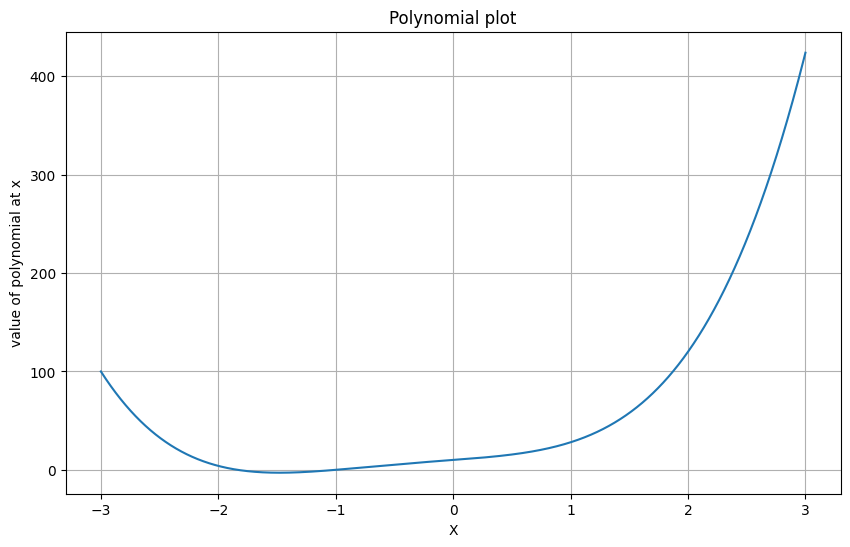

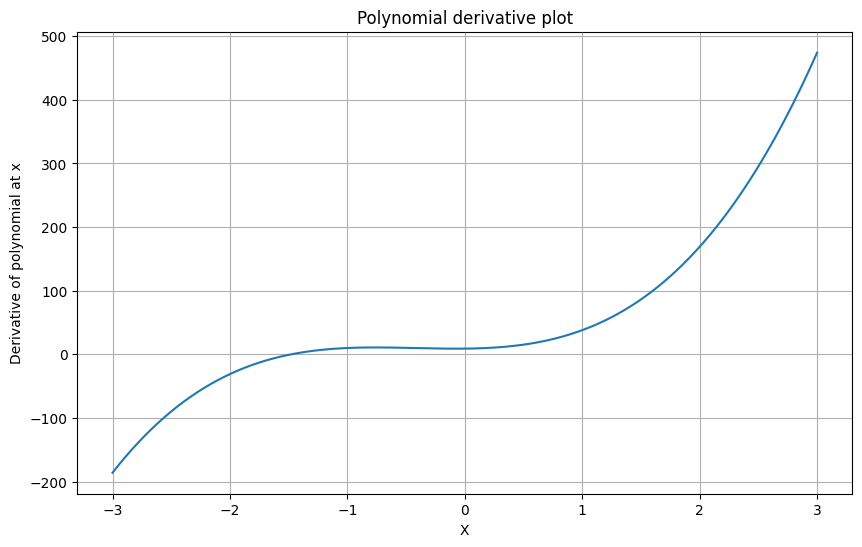

In [163]:
import numpy as np

p = Polynomial(4,[3, 5, 1, 9, 10])
print(p)

print(f"Evaluation(x=2): {p.evaluate(2)}")
print(f"Derivative(x=2): {p.derivative_func(2)}")

p.plot(-3,3)
p.plot_derivative(-3,3)

In [164]:

try:
    degree = 3
    coefficients = [5,2,4]
    print(f"Creating a new Polynomial with degree {degree} and {coefficients}....")
    p1 = Polynomial(degree,coefficients)
except ValueError as err:
    print(f"Error: {err}")

print()
p2 = Polynomial(0,[9])
print(p2)
print(f"Evaluation(x=3): {p2.evaluate(3)}")
print(f"Derivative(x=3): {p2.derivative_func(3)}")


Creating a new Polynomial with degree 3 and [5, 2, 4]....
Error: A polynomial of degree 3 should have 4 coefficients, but only 3 are given

A polynomial is created with degree 0 and coefficeints (9.0,)
Evaluation(x=3): 9.0
Derivative(x=3): 0.0


In [165]:
p3 = Polynomial(3,[0.7,0,2.5,0])
print(p3)
print(f"Evaluation(x=3): {p3.evaluate(3)}")
print(f"Derivative(x=3): {p3.derivative_func(3)}")

A polynomial is created with degree 3 and coefficeints (0.7, 0.0, 2.5, 0.0)
Evaluation(x=3): 26.4
Derivative(x=3): 21.4


## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [142]:
from dataclasses import dataclass, field

@dataclass
class Product:
    name: str
    price: float

    def __post_init__(self):
        if not self.name.strip():
            raise ValueError("Name can not be null")
        
        if not isinstance(self.price, (float,int)):
            raise TypeError("Price should be numeric")
        if self.price < 0:
            raise ValueError("Price can not be negative")
        

@dataclass
class ShoppingCart:
    products: list[Product] = field(default_factory=list)

    def add_item(self, product: Product):
        if not isinstance(product, Product):
            raise TypeError("Only products can be added to the cart")
        print(f"Adding {product.name} product to the cart")
        self.products.append(product)



    def remove_item(self, product_name:str):
        matching_products = [product for product in self.products if (product.name).strip().casefold() == product_name.strip().casefold()]
        
        if len(matching_products) > 0:
            for product in matching_products:
                print(f"Removing {product.name} from the cart, price of the product is {product.price}")
                self.products.remove(product)
        else:
            raise ValueError(f"Product with product name {product_name} does not exist")


    def calculate_total(self) ->float:
        total = sum(product.price for product in self.products)
        return round(total,2)


    def __str__(self):
        if not self.products:
            return "Shopping cart is empty"
        return "\n".join(f"Product: {p.name}, Price: {p.price}" for p in self.products)
    

In [143]:
p1 = Product("Poland Spring", 13.00)
p2 = Product("Saratoga", 24.99)
p3 = Product("Aquapanna", 14.99)
p4 = Product("Saratoga", 22.99)

p5 = Product("Saratoga", 24.99)

sc1 = ShoppingCart()
sc1.add_item(p1)
sc1.add_item(p2)
sc1.add_item(p3)
sc1.add_item(p4)
sc1.add_item(p5)
print("\nShopping cart:")
print(sc1)
print(f"Total cart price: {sc1.calculate_total()}")

print("--------------")
sc1.remove_item("Saratoga")
print(sc1)
print(f"Total cart price: {sc1.calculate_total()}")

print("--------------")
try:
    print("Trying to remove a product which does not exist")
    sc1.remove_item("test")
except ValueError as err:
    print(f"Error: {err}")

print("-------")
print("Current Shopping cart:")
print(sc1)
print(f"Total cart price: {sc1.calculate_total()}")

print("--------------")
print("Second shopping cart")
sc2 = ShoppingCart()
sc2.add_item(p2)
print(sc2)

Adding Poland Spring product to the cart
Adding Saratoga product to the cart
Adding Aquapanna product to the cart
Adding Saratoga product to the cart
Adding Saratoga product to the cart

Shopping cart:
Product: Poland Spring, Price: 13.0
Product: Saratoga, Price: 24.99
Product: Aquapanna, Price: 14.99
Product: Saratoga, Price: 22.99
Product: Saratoga, Price: 24.99
Total cart price: 100.96
--------------
Removing Saratoga from the cart, price of the product is 24.99
Removing Saratoga from the cart, price of the product is 22.99
Removing Saratoga from the cart, price of the product is 24.99
Product: Poland Spring, Price: 13.0
Product: Aquapanna, Price: 14.99
Total cart price: 27.99
--------------
Trying to remove a product which does not exist
Error: Product with product name test does not exist
-------
Current Shopping cart:
Product: Poland Spring, Price: 13.0
Product: Aquapanna, Price: 14.99
Total cart price: 27.99
--------------
Second shopping cart
Adding Saratoga product to the cart